# Data Visualization; Feature Engineering

**Contents:**
- Visualize potential relationships between key variables.
- Feature Engineering.


----


#### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade seaborn
import seaborn as sns

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


### First Look at Data

In [46]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.shape

(90, 18)

In [48]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Visualizing relationships important for launch outcome

#### <span style="color:blue;"> **How `FlightNumber` and `Payload` might affect launch outcome.**

- `FlightNumber` is an ID number that is ordered by launch attempt dates, thus representing potential temporal trends.
- `Payload` is the capacity of load (in kg) a rocket can carry to space.

Below is a scatterplot of <code>FlightNumber</code> vs. <code>PayloadMass</code>; with overlay by the outcome of the launch.   
- We see that as the flight number increases, the first stage is more likely to land successfully. 
- The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


Supppress warning messages for Future panda versons, [discussion](https://stackoverflow.com/questions/77882407/seaborn-futurewarning-caused-by-pandas-dataframe)

In [67]:
import warnings 
# Suppress the specific FutureWarning 
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

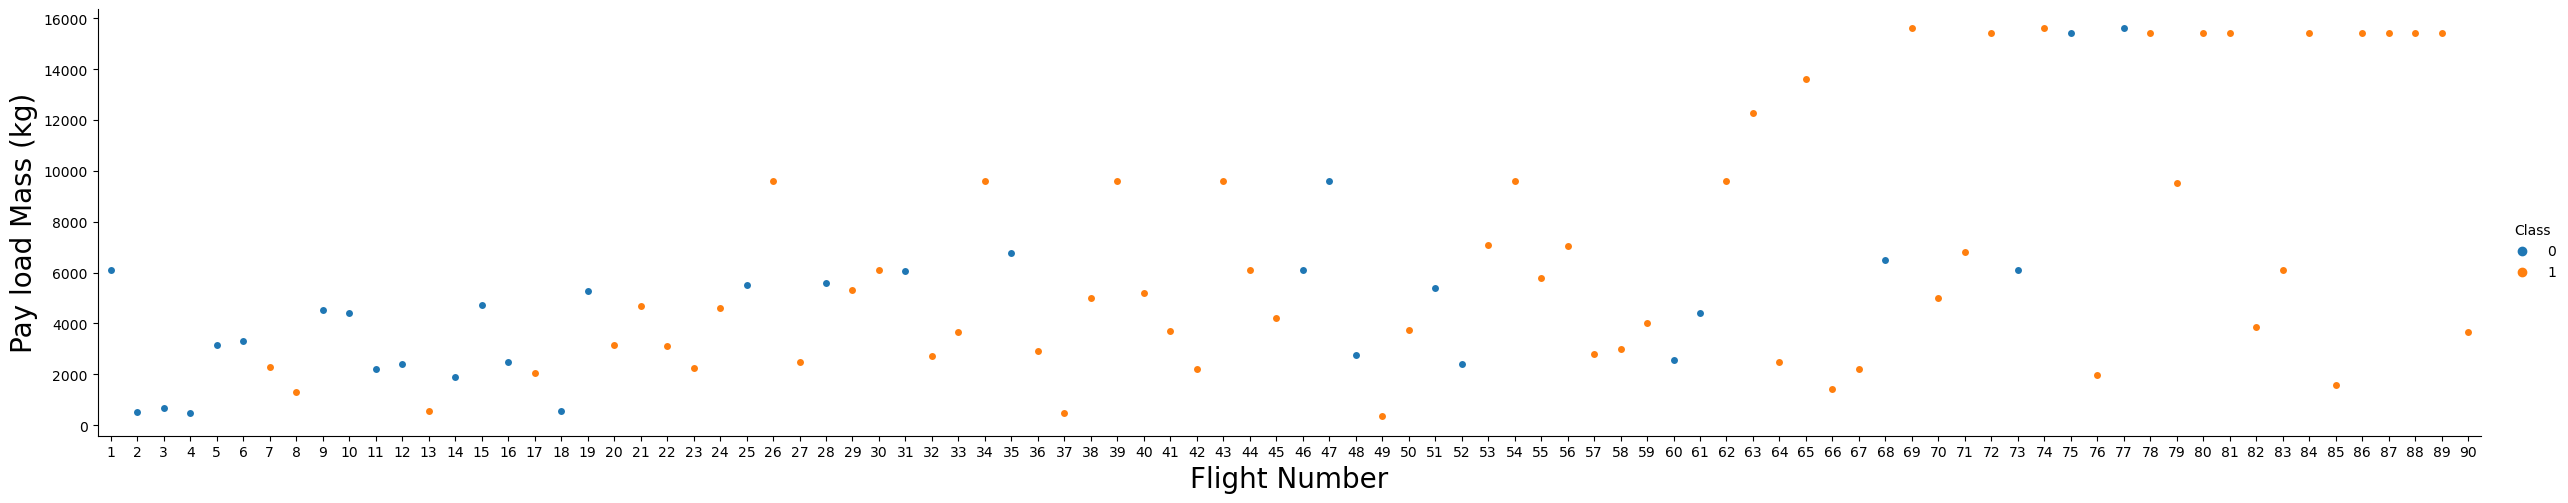

In [69]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue='Class', data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

**Observations:**  
✔️ later flights have higher chances of success.  
✔️ heavier payload seem to be associated with have higher chances of success.

#### <span style="color:blue;"> **How `LaunchSite` might affect launch outcome.**

In [71]:
df[['LaunchSite', 'Class']].groupby(['LaunchSite'], as_index=False).mean()   #

,LaunchSite,Class
0,CCAFS SLC 40,0.600000
1,KSC LC 39A,0.772727
2,VAFB SLC 4E,0.769231


**Observations:**  
We see that different launch sites have different success rates.   
<code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.



</br>


***Next I will look further at how other features may interact with `LaunchSite` in its impact on launch outcome.***


#### <span style="color:blue;"> **Visualize how `FlightNumber` and `LaunchSite` might interact to affect launch outcome.**

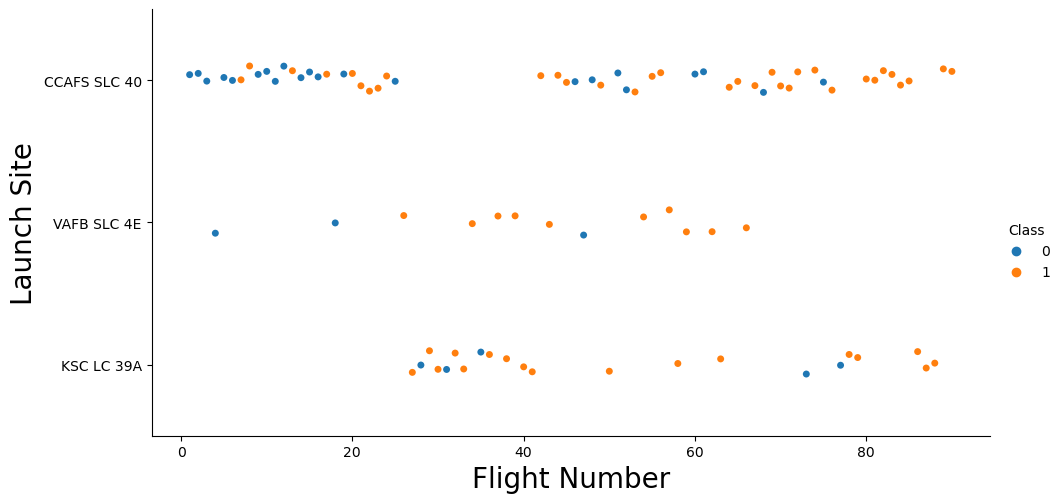

In [73]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()
#

**Observations:**  
✔️ Site CCAFS SLC40 has the greatest number of flights; VAFB SLC 4E has the least.   
✔️ Site KSCLC 39A was initiated as a launch site later than the other two and has the highest rate of successful launches.

#### <span style="color:blue;"> **Visualize how `Payload` and `LaunchSite` might interact to affect launch outcome.**

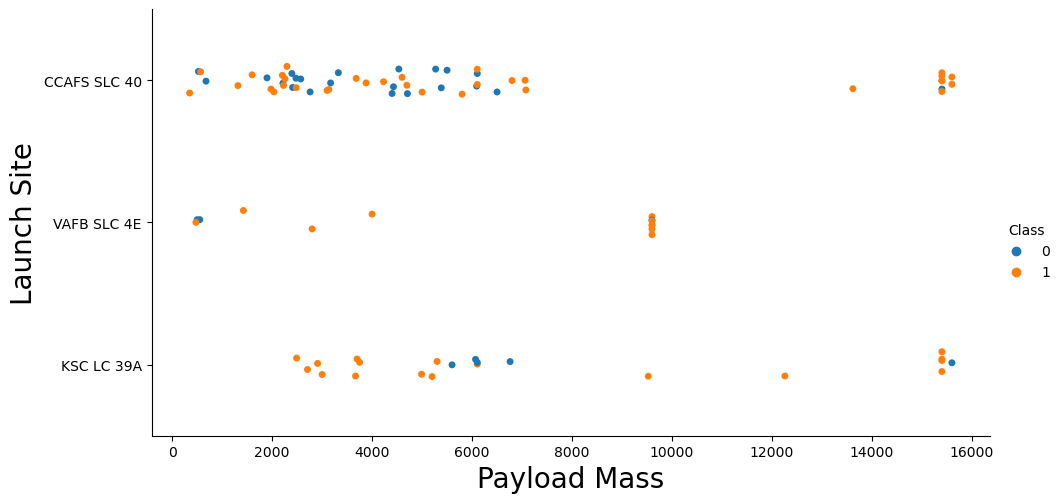

In [78]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 2)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()
#

**Observations:**  
✔️ Site VAFB SLC 4E  does not carry launches with heavy payload mass(greater than 10000).  
✔️ KSCLC 39A on average tend to launch bigger payload mass than other sites.  
✔️ Launches with payload mass bigger than 800 are more likely to succeed.  
✔️ But for payload less than 5000, site KSCLC 39A has a 100% success rate. 

#### <span style="color:blue;"> **How `Orbit` might affect launch outcome.**

In [83]:
df['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [85]:
df_orb = df[['Orbit', 'Class']].groupby(['Orbit'], as_index=False).mean()
df_orb

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


Text(0.5, 1.0, 'Success Rate for Each Orbit')

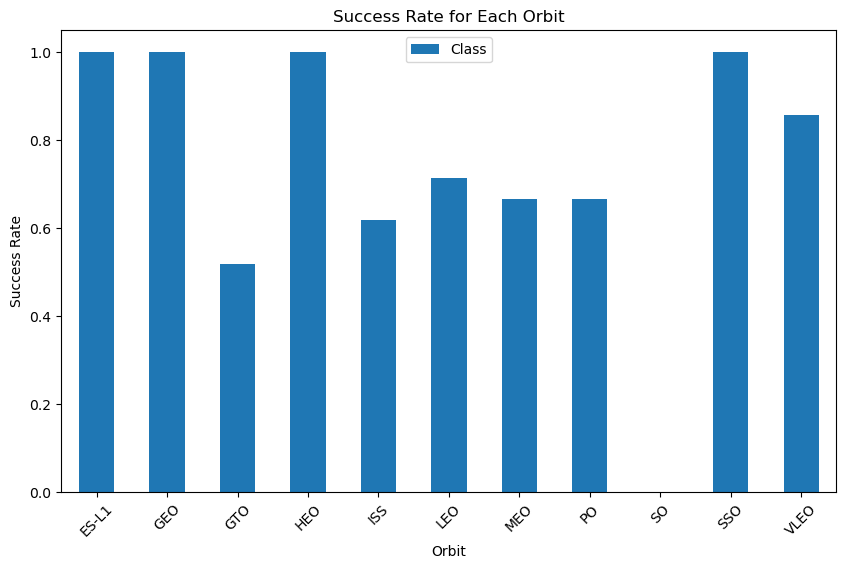

In [87]:
# Create bar chart
orb = df_orb.set_index('Orbit')   # making orbit the index (row name) to show text on x ticks
orb.plot(kind='bar', figsize=(10,6), rot=45)   # this line by itself does not require matplotlib
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Orbit')
#

**Observations:**  
✔️ Launches at the ES-L1, GEO, HEO, SSO orbits have a 100% success rate.  
✔️ GTO orbit has the lowest success rate at 50%.  
✔️ For all other orbits, the success rate ranges between 60% to 85%. 


</br>


***Next I will look further at how other features may interact with `Orbit` in its impact on launch outcome.***


#### <span style="color:blue;"> **Visualize how `FlightNumber` and `Orbit` might interact to affect launch outcome.**

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


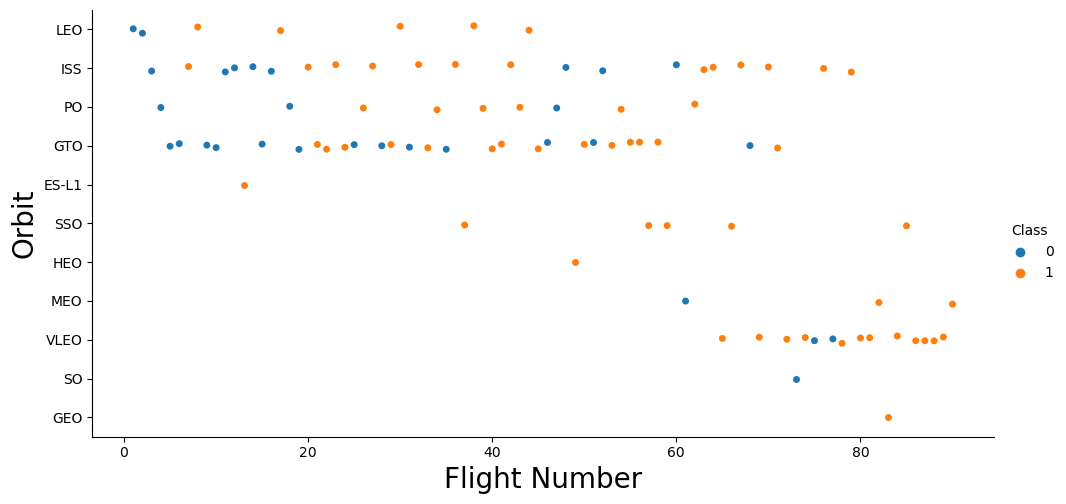

In [93]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()
#

**Observations:**  
✔️ Earlier fights tend to launch at Orbits LEO, ISS, PO, GTO.  
✔️ Later flights mostly use orbits VLEO, SSO, MEO.  
✔️ GTO orbit has the least rate of successful launches; while SSO has a perfect record.  
✔️ Most recent successful launches tend to happen at orbits VLEO, ISS, MEO.  
✔️ In the LEO orbit the Success appears related to the number of flights.  
✔️ On the other hand, there seems to be no relationship between flight number when in GTO orbit.

#### <span style="color:blue;"> **Visualize how `Payload` and `Orbit` might interact to affect launch outcome.**

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


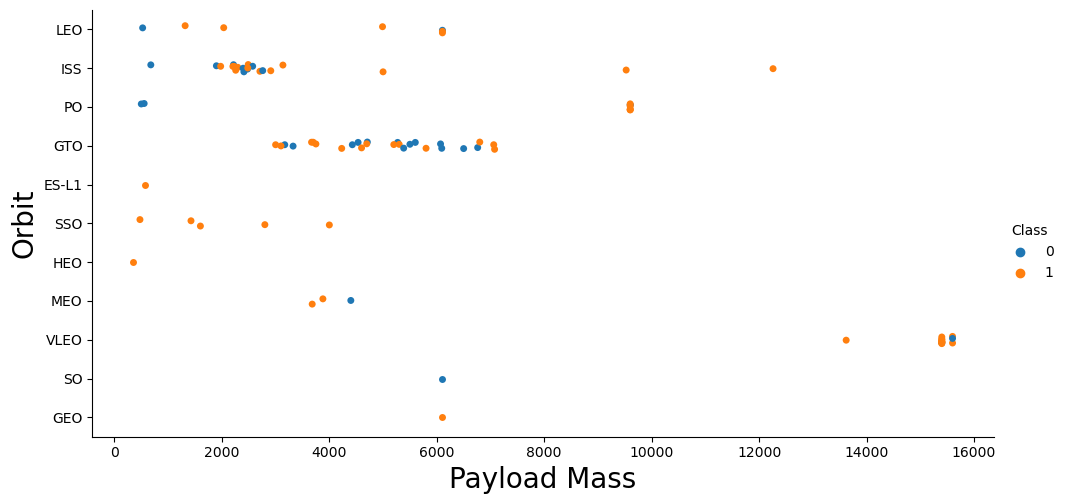

In [97]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 2)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()
#

**Observations:**   
✔️ Lower payload flights tend to launch at orbits LEO, ISS, PO, GTO, SSO.  
✔️ Higher payload flights mostly use orbit VLEO or ISS.  
✔️ With heavy payloads the successful launches are more for Polar, LEO, and ISS. 

#### <span style="color:blue;"> **Visualize time trend of launch success.**

In [100]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [102]:
year = Extract_year(df['Date'])
year # success
type(year) # list
df['Year'] = pd.DataFrame(year)
df.head()
#

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [104]:
trend = df[['Year', 'Class']].groupby(['Year'], as_index=False).mean()
trend

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


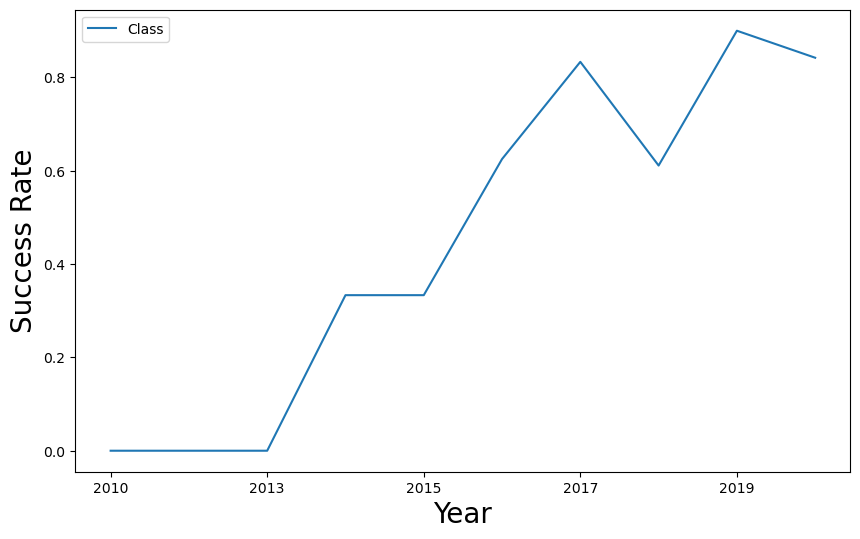

In [106]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
trd = trend.set_index('Year')   # making year the index (row name) to show text on x ticks
trd.plot(kind='line', figsize=(10,6))
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

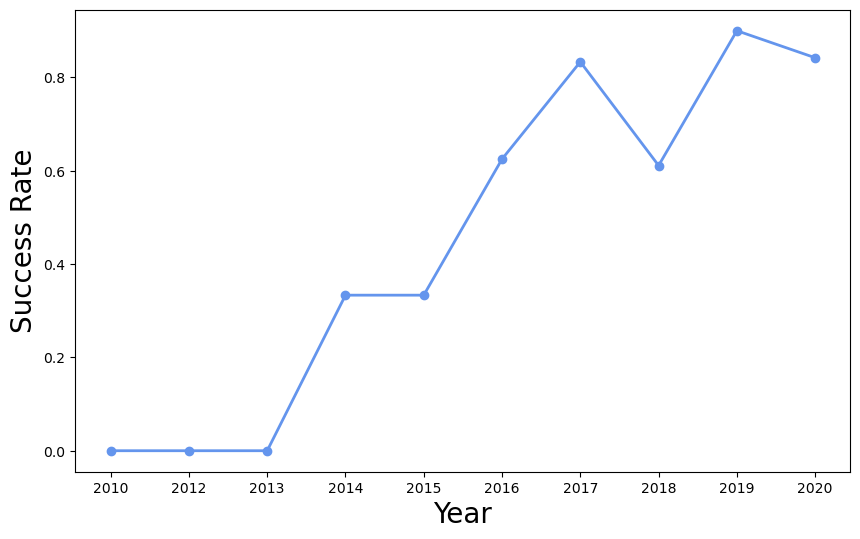

In [108]:
plt.figure(figsize=(10,6))
plt.plot(trend['Year'], trend['Class'], color='cornflowerblue', marker='o', linewidth=2)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
#plt.grid(True)
plt.show()
#

**Observations:**  
✔️  Success started since 2013.  
✔️  Success rate increased since then, reaching over 80% in 2017.  
✔️  Since 2017, the rate of success has fluctuated but averaging around 80%. 

### Features Engineering 


Based on above insights about how each important variable would affect the success rate, select the features that will be used in success prediction.


In [132]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [134]:
features.shape

(90, 12)

**Create dummy variables for categorical features**

Apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. 

In [138]:
features_one_hot = pd.get_dummies(features, columns=["Orbit","LaunchSite","LandingPad","Serial"])
features_one_hot.head()
#

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


**Cast all numeric columns to `float64`**


Now that <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [145]:
features_one_hot = features_one_hot.astype('float64')  
#

In [147]:
features_one_hot.shape

(90, 80)

**Export to csv:**

In [150]:
#features_one_hot.to_csv('sw_dataset_part_3.csv', index=False)